In [102]:
# Import Libraries
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [103]:
loan = pd.read_csv("loan.csv")

/Users/vbamil/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
loan.shape

(39717, 111)

In [105]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [106]:
loan.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       6

In [107]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


# Data Cleaning

In [108]:
# Summing up the missing values (column-wise)
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [109]:
# Removing columns having more than 90% missing values
loan = loan.drop('tot_hi_cred_lim', axis=1)
loan = loan.drop('total_bal_ex_mort', axis=1)
loan = loan.drop('total_bc_limit', axis=1)
loan = loan.drop('total_il_high_credit_limit', axis=1)
loan = loan.drop('num_tl_op_past_12m', axis=1)
loan = loan.drop('pct_tl_nvr_dlq', axis=1)
loan = loan.drop('percent_bc_gt_75', axis=1)
loan = loan.drop('num_tl_120dpd_2m', axis=1)
loan = loan.drop('num_tl_30dpd', axis=1)
loan = loan.drop('num_tl_90g_dpd_24m', axis=1)
loan = loan.drop('num_rev_accts', axis=1)
loan = loan.drop('num_rev_tl_bal_gt_0', axis=1)
loan = loan.drop('num_sats', axis=1)
loan = loan.drop('mths_since_last_major_derog', axis=1)
loan = loan.drop('annual_inc_joint', axis=1)
loan = loan.drop('dti_joint', axis=1)
loan = loan.drop('verification_status_joint', axis=1)
loan = loan.drop('tot_coll_amt', axis=1)
loan = loan.drop('tot_cur_bal', axis=1)
loan = loan.drop('open_acc_6m', axis=1)
loan = loan.drop('open_il_6m', axis=1)
loan = loan.drop('open_il_12m', axis=1)
loan = loan.drop('open_il_24m', axis=1)
loan = loan.drop('mths_since_rcnt_il', axis=1)
loan = loan.drop('total_bal_il', axis=1)
loan = loan.drop('il_util', axis=1)
loan = loan.drop('open_rv_12m', axis=1)
loan = loan.drop('open_rv_24m', axis=1)
loan = loan.drop('max_bal_bc', axis=1)
loan = loan.drop('all_util', axis=1)
loan = loan.drop('total_rev_hi_lim', axis=1)
loan = loan.drop('inq_fi', axis=1)
loan = loan.drop('total_cu_tl', axis=1)
loan = loan.drop('inq_last_12m', axis=1)
loan = loan.drop('acc_open_past_24mths', axis=1)
loan = loan.drop('avg_cur_bal', axis=1)
loan = loan.drop('bc_open_to_buy', axis=1)
loan = loan.drop('bc_util', axis=1)
loan = loan.drop('mo_sin_old_il_acct', axis=1)
loan = loan.drop('mo_sin_old_rev_tl_op', axis=1)
loan = loan.drop('mo_sin_rcnt_rev_tl_op', axis=1)
loan = loan.drop('mo_sin_rcnt_tl', axis=1)
loan = loan.drop('mths_since_recent_bc', axis=1)
loan = loan.drop('mths_since_recent_bc_dlq', axis=1)
loan = loan.drop('mths_since_recent_inq', axis=1)
loan = loan.drop('mths_since_recent_revol_delinq', axis=1)
loan = loan.drop('num_accts_ever_120_pd', axis=1)
loan = loan.drop('num_actv_bc_tl', axis=1)
loan = loan.drop('num_actv_rev_tl', axis=1)
loan = loan.drop('num_bc_sats', axis=1)
loan = loan.drop('num_bc_tl', axis=1)
loan = loan.drop('mort_acc', axis=1)
loan = loan.drop('num_il_tl', axis=1)
loan = loan.drop('num_op_rev_tl', axis=1)
loan = loan.drop('next_pymnt_d', axis=1)
loan = loan.drop('mths_since_last_record', axis=1)

In [110]:
# Summing up the missing values (column-wise)
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [111]:
# Removing columns that are not helpful for data analysis
loan = loan.drop('desc', axis=1)
loan = loan.drop('mths_since_last_delinq', axis=1)
loan = loan.drop('url', axis=1)
loan = loan.drop('pymnt_plan', axis=1)
loan = loan.drop('initial_list_status', axis=1)
loan = loan.drop('collections_12_mths_ex_med', axis=1)
loan = loan.drop('policy_code', axis=1)
loan = loan.drop('application_type', axis=1)
loan = loan.drop('acc_now_delinq', axis=1)
loan = loan.drop('chargeoff_within_12_mths', axis=1)
loan = loan.drop('delinq_amnt', axis=1)
loan = loan.drop('pub_rec_bankruptcies', axis=1)
loan = loan.drop('tax_liens', axis=1)
loan = loan.drop('id', axis=1)
loan = loan.drop('member_id', axis=1)
loan = loan.drop('zip_code', axis=1)

In [112]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [113]:
loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13


In [114]:
# The data is classified into three categories 
## 1. Borrower Info
## 2. Loan Characteristics
## 3. Borrower behavior variables 

In [115]:
# Dropping borrower behavior variables as they will not help in analysis as they were not avaiable at the time to loan application
loan = loan.drop('earliest_cr_line', axis=1)
loan = loan.drop('delinq_2yrs', axis=1)
loan = loan.drop('pub_rec', axis=1)
loan = loan.drop('inq_last_6mths', axis=1)
loan = loan.drop('out_prncp', axis=1)
loan = loan.drop('out_prncp_inv', axis=1)
loan = loan.drop('total_pymnt', axis=1)
loan = loan.drop('total_pymnt_inv', axis=1)
loan = loan.drop('total_rec_prncp', axis=1)
loan = loan.drop('total_rec_int', axis=1)
loan = loan.drop('total_rec_late_fee', axis=1)
loan = loan.drop('recoveries', axis=1)
loan = loan.drop('collection_recovery_fee', axis=1)
loan = loan.drop('last_pymnt_d', axis=1)
loan = loan.drop('last_pymnt_amnt', axis=1)
loan = loan.drop('last_credit_pull_d', axis=1)

In [116]:
loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,open_acc,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,3,13648,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,3,1687,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,2,2956,98.50%,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,10,5598,21%,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,15,27783,53.90%,38
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,9,7963,28.30%,12
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,7,17726,85.60%,11
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,4,8221,87.50%,4
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,11,5210,32.60%,13
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,2,9279,36.50%,3


In [117]:
loan = loan.drop('revol_bal', axis=1)
loan = loan.drop('revol_util', axis=1)

In [118]:
loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,open_acc,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,3,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,3,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,2,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,10,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,15,38
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,9,12
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,7,11
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,4,4
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,11,13
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,2,3


In [119]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

In [120]:
# Funded amount can be dropped as we already have funded amount investment column
loan = loan.drop('funded_amnt', axis=1)

In [121]:
# Extract numerical value from int_rate column and change datatype from object to float
loan["int_rate"] = loan['int_rate'].apply(lambda x : x[:-1])
loan.int_rate = loan.int_rate.astype("float64")

In [122]:
# Extract numerical value from emp_length column and change datatype from object to float
loan['emp_length'] = loan['emp_length'].astype(str)
loan['emp_length'] = loan['emp_length'].apply(lambda x : x[:-5])
loan['emp_length'] = loan['emp_length'].apply(lambda x : x.replace("+",""))
loan['emp_length'] = loan['emp_length'].apply(lambda x : x.replace("<",""))
loan['emp_length'] = loan['emp_length'].str.strip()

In [123]:
loan.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
      1075
Name: emp_length, dtype: int64

In [124]:
# Summing up the missing values (column-wise)
round(100*(loan.isnull().sum()/len(loan.index)),2)

loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              6.19
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
addr_state             0.00
dti                    0.00
open_acc               0.00
total_acc              0.00
dtype: float64

In [125]:
# Employee title and Title are not very useful for analysis so dropping those column
loan = loan.drop('emp_title', axis=1)
loan = loan.drop('title', axis=1)

In [126]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.00,15000.00,35000.00
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.00,14400.00,35000.00
int_rate,39717.0,12.021177,3.724825,5.42,9.25,11.86,14.59,24.59
installment,39717.0,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.00,82300.00,6000000.00
dti,39717.0,13.315130,6.678594,0.00,8.17,13.40,18.60,29.99
open_acc,39717.0,9.294408,4.400282,2.00,6.00,9.00,12.00,44.00
total_acc,39717.0,22.088828,11.401709,2.00,13.00,20.00,29.00,90.00


In [127]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [128]:
# Removing Current values from loan status as we are only interested in finding the defaulters which can be predicted from Past data where loan is either fully paid or charged off
loan_cleared = loan[(loan['loan_status'] == 'Fully Paid')| (loan['loan_status'] == 'Charged Off')]

# Data Visualization 

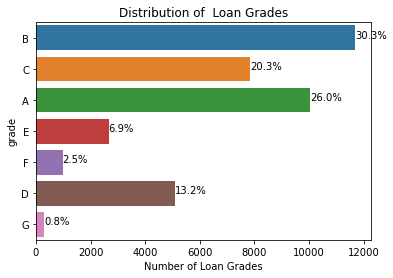

In [129]:
# Distribution of Loan Grades
ax = sns.countplot(y="grade", data=loan_cleared)
plt.title('Distribution of  Loan Grades')
plt.xlabel('Number of Loan Grades')

total = len(loan_cleared['grade'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

*The graph shows lowest risk loan percentage is higher*

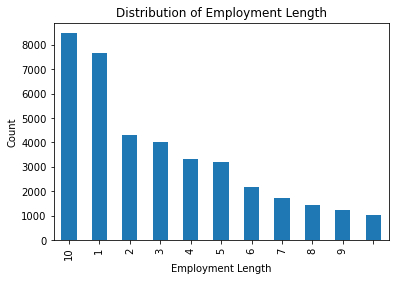

In [130]:
# Distribution of Employment Length
loan_cleared['emp_length'].value_counts().plot.bar()

# Add title and axis names
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')

plt.show()

The graph explains the loans are higher for less employment length but there is sudden increase in loans for employment length greater than 10 years

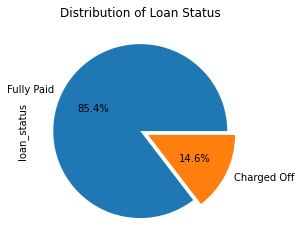

In [131]:
# Percentage of Loan Status

explode = (0, 0.1)
loan_cleared['loan_status'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%')
plt.title('Distribution of Loan Status')
plt.show()

The pie chart indicates that ~ 85% of loans are fully paid and ~15% are charged off. The loan is charged off when an account didn’t made payment at least over 180 days so we will be interested in these loans

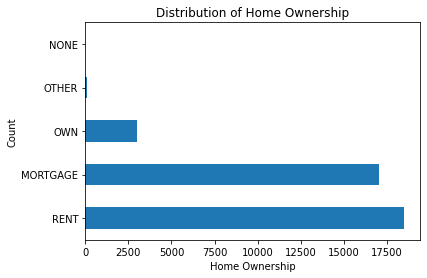

In [132]:
# Distribution of Home Ownership

loan_cleared['home_ownership'].value_counts().plot.barh()

# Add title and axis names
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

plt.show()

The graph shows mostly the borrower renting a house or have mortgage are taking loans compared with people having their own house

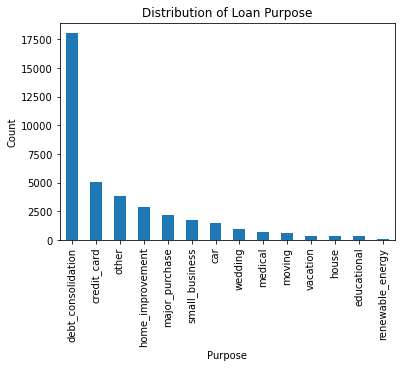

In [133]:
# Distribution of Loan Purpose

loan_cleared['purpose'].value_counts().plot.bar()

# Add title and axis names
plt.title('Distribution of Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')

plt.show()

The graph shows most of the borrower are taking loan for debt consolidation which indicate they are already under debt from previous loan. 

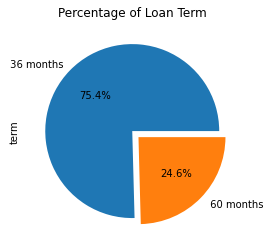

In [134]:
# Percentage of Loan Term

explode = (0, 0.1)
loan_cleared['term'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%')
plt.title('Percentage of Loan Term')
plt.show()

There are around 25% long term loans which increases the risk of default by the borrower

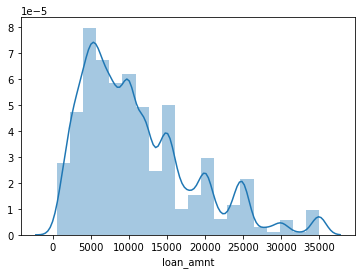

In [135]:
# Distribution of Requested Loan Amount
sns.distplot(loan_cleared.loan_amnt, bins=20)
plt.show()

The maximum frequency occurs around the 5000 - 8000 bucket and the maximum density also lies in the 5000 - 8000 bucket in the distplot.

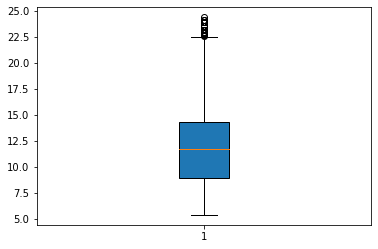

In [136]:
# Distribution of Interest Rate
plt.boxplot(loan_cleared.int_rate, patch_artist=True)
plt.show()

If we consider the IQR range, the spread of interest rate is from 9% to 15%.

In this scenario we consider mean
which is approx 12%.


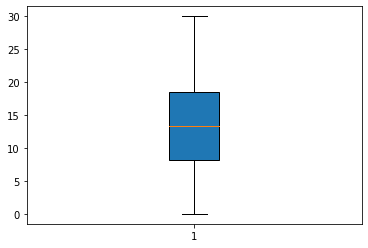

In [137]:
# Distribution of Debt to Income ratio
plt.boxplot(loan_cleared.dti, patch_artist=True)
plt.show()

The IQR range, the spread of interest rate is from 8% to 18%.

In this scenario we consider mean which is approx 12%. Lesser percentage reduces the risk of default by the borrower


In [138]:
# Function to return value 0 or 1 based on loan status
def default_rate(row):
    if row == "Charged Off":
        val = 1
    elif row == "Fully Paid":
        val = 0
    return val



In [139]:
# Create New column "Default Rate" to show 1 and 0 values for Loan Status "Charged Off" and "Fully Paid"
loan_cleared['default_rate'] = loan_cleared.loan_status.apply(default_rate)

<ipython-input-139-9aacd4e92d88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_cleared['default_rate'] = loan_cleared.loan_status.apply(default_rate)


In [140]:
loan_cleared.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,total_acc,default_rate
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,3,9,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,4,1
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,10,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,10,37,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,9,12,0
6,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,7,11,0
7,3000,3000.0,36 months,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,4,4,0
8,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,11,13,1
9,5375,5350.0,60 months,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,2,3,1
10,6500,6500.0,60 months,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,14,23,0


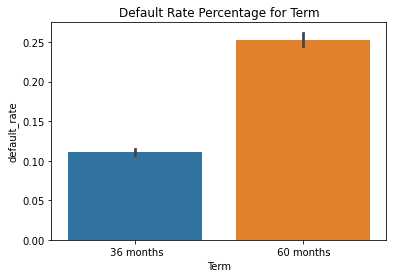

In [141]:
# Default Analysis of Default Rate for Term
sns.barplot('term','default_rate',  data=loan_cleared)
plt.title('Default Rate Percentage for Term')
plt.xlabel('Term')

plt.show()

The graph shows that there are more chances that borrower with 60 months term will likely to be defaulted as compared to 36 months


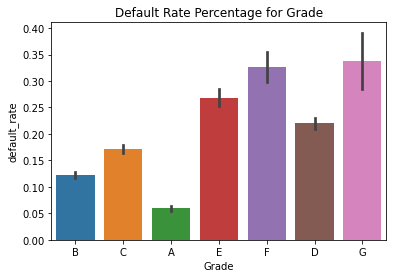

In [142]:
# Default Analysis of Default Rate for Grade
sns.barplot('grade','default_rate',  data=loan_cleared)
plt.title('Default Rate Percentage for Grade')
plt.xlabel('Grade')

plt.show()

The graph shows that grade G, F and then E are having more chances to be defaulted 


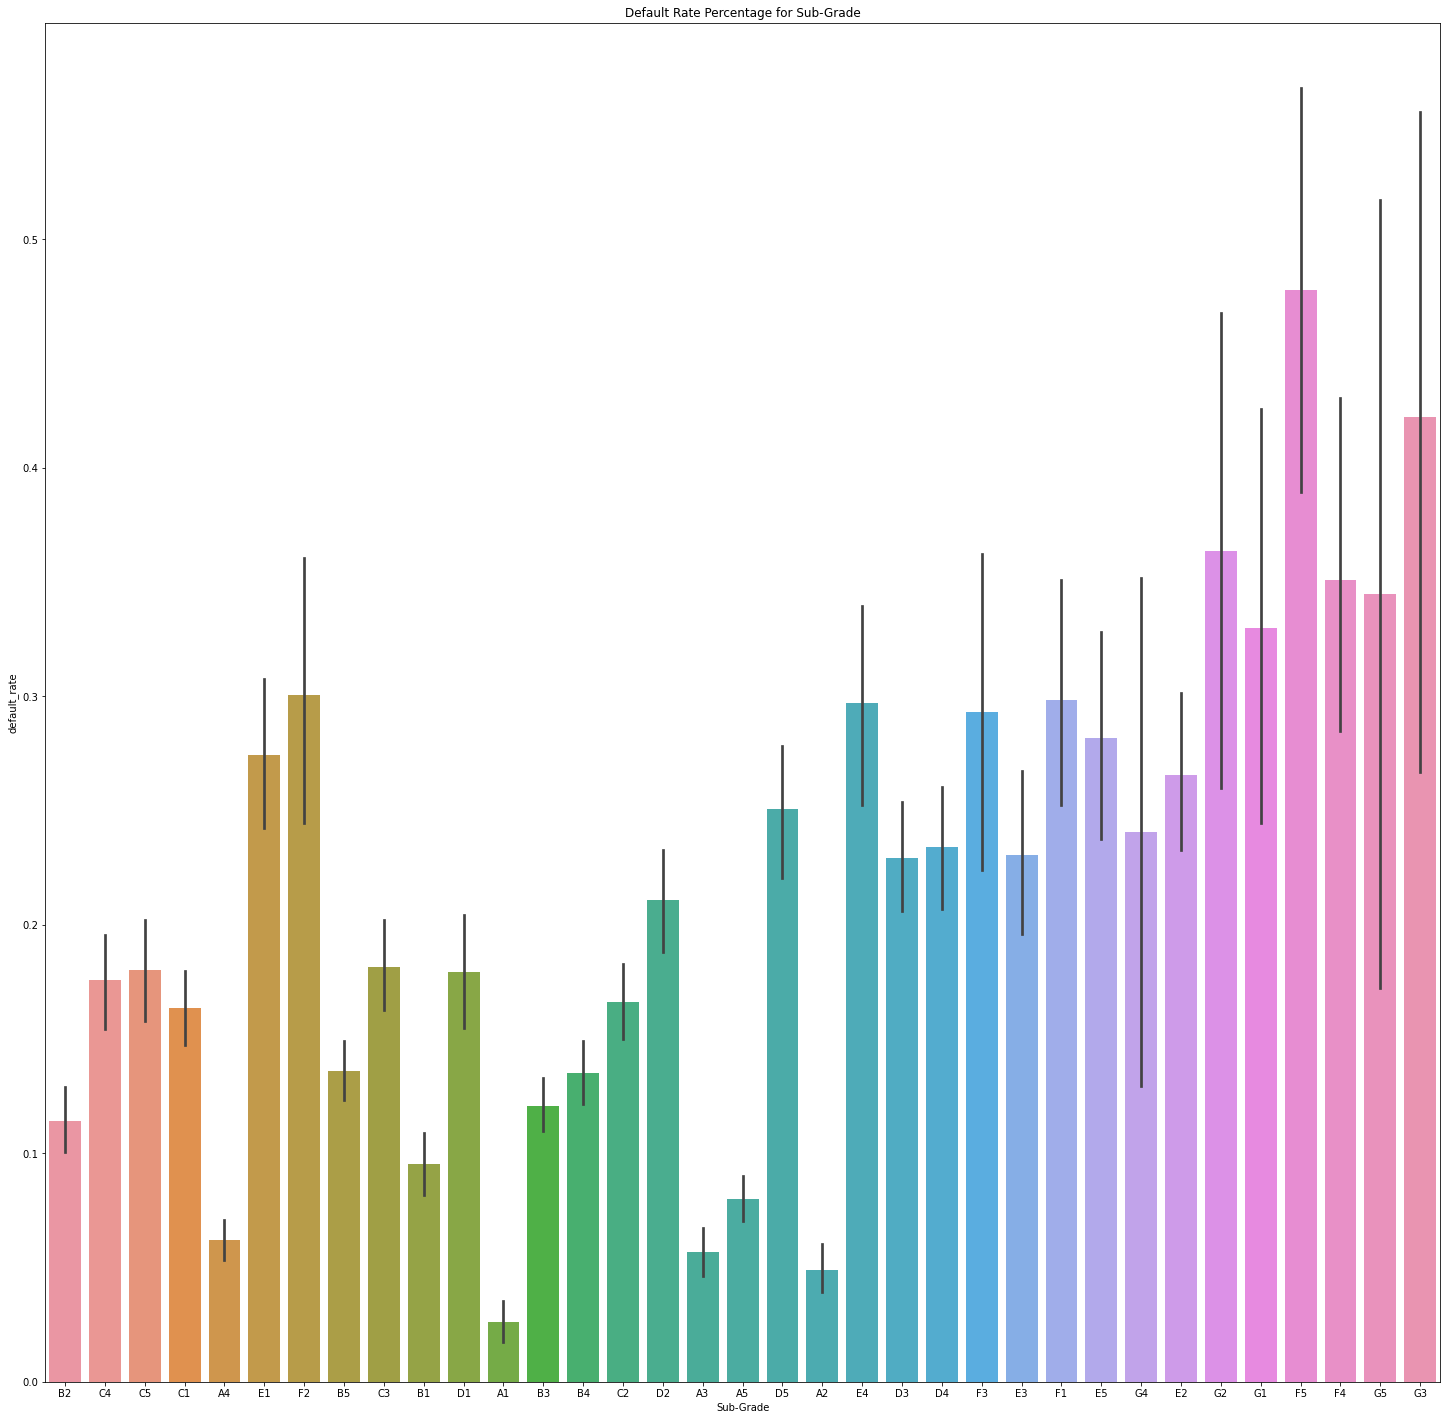

In [143]:
# Default Analysis of Default Rate for Sub-Grade
plt.figure(figsize=[25,25])
sns.barplot('sub_grade','default_rate',  data=loan_cleared)
plt.title('Default Rate Percentage for Sub-Grade')
plt.xlabel('Sub-Grade')

plt.show()

“F5” subgrade has highest risk of getting defaulted followed by “G3” and then “F2”. 

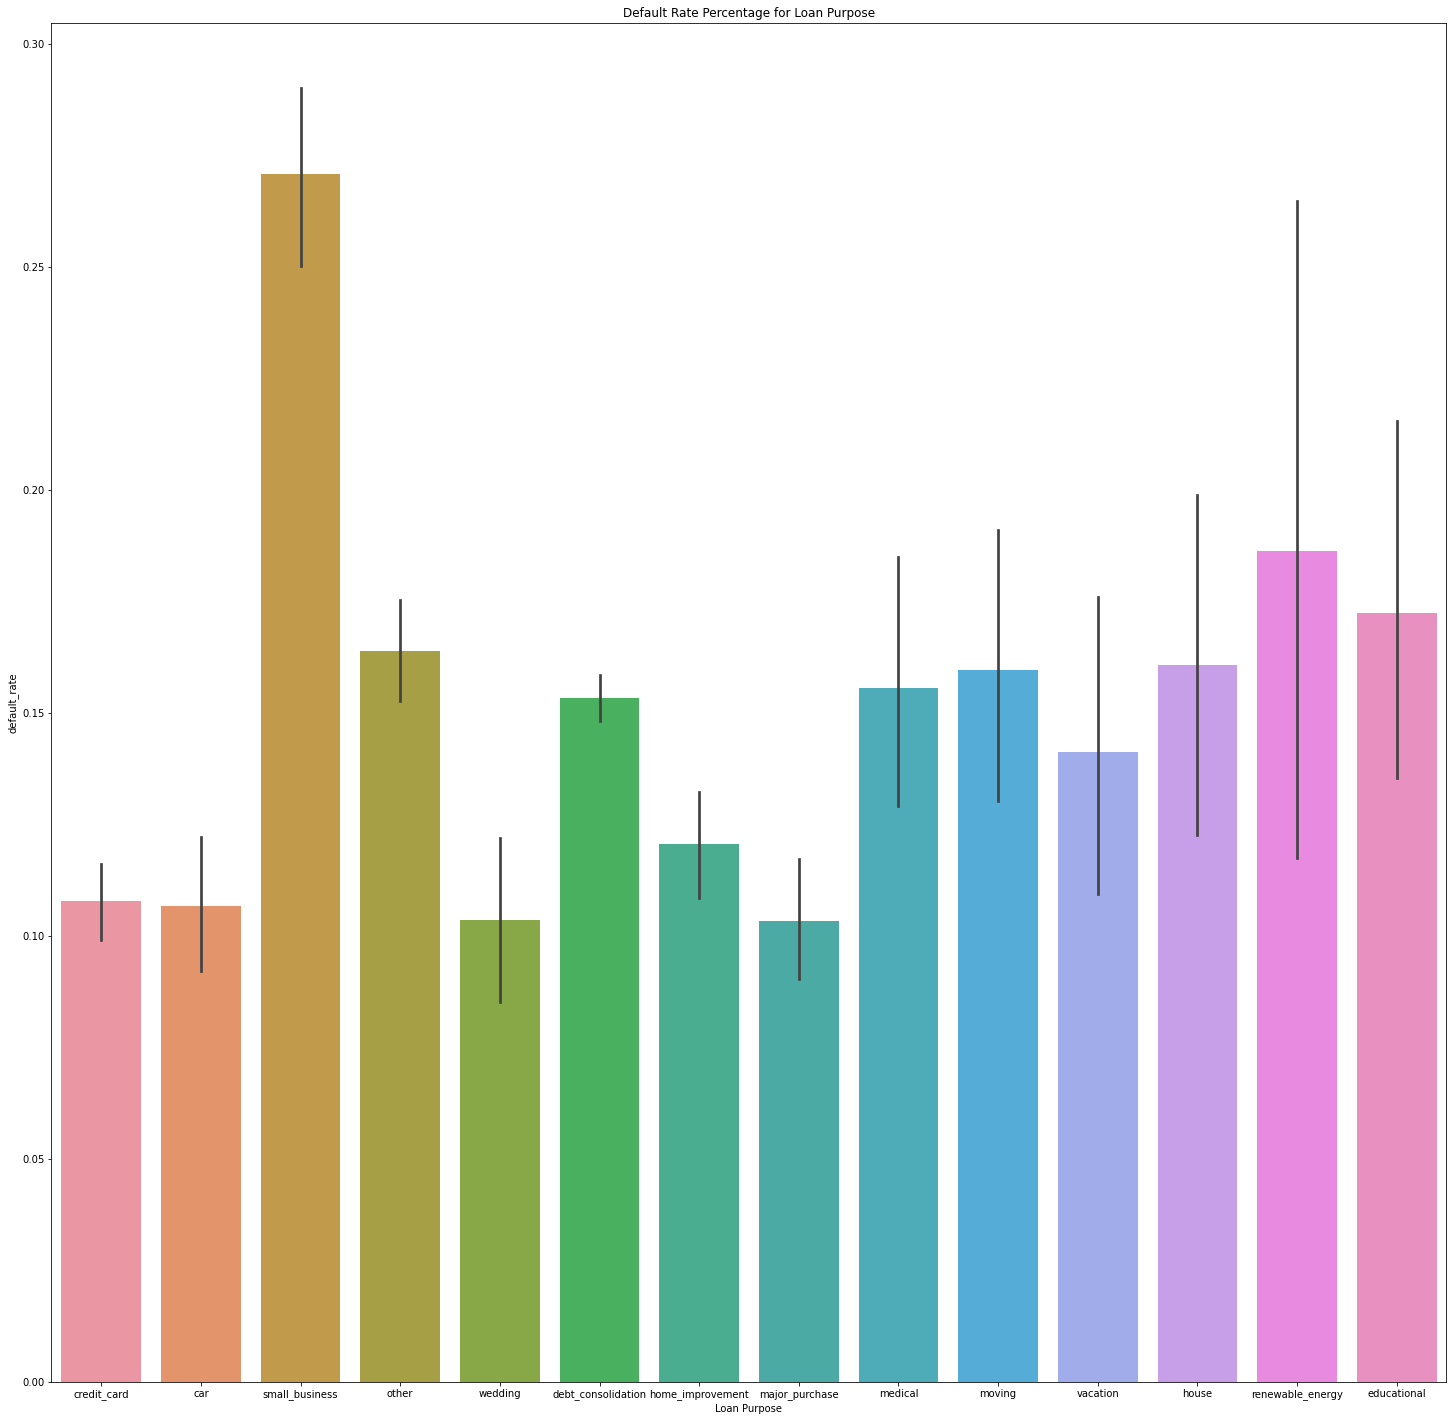

In [144]:
# Default Analysis of Default Rate for Loan Purpose
plt.figure(figsize=[25,25])
sns.barplot('purpose','default_rate',  data=loan_cleared)
plt.title('Default Rate Percentage for Loan Purpose')
plt.xlabel('Loan Purpose')

plt.show()

“Small business” loan purpose has highest risk of getting defaulted followed by “renewable energy”.


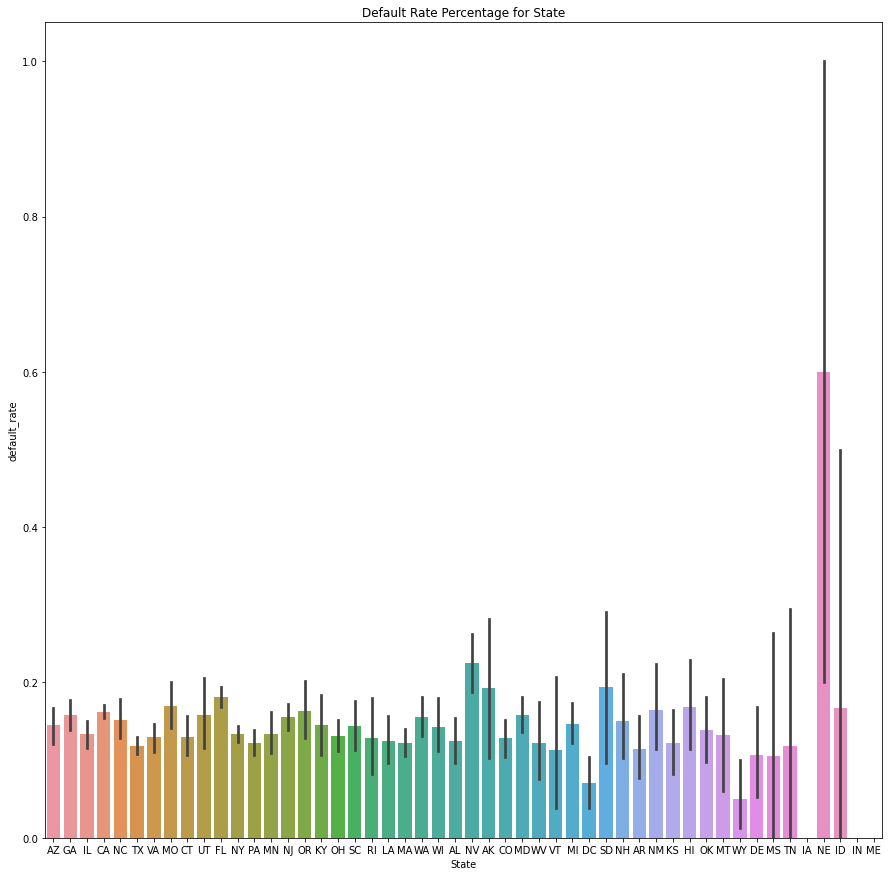

In [145]:
# Default Analysis of Default Rate for State
plt.figure(figsize=[15,15])
sns.barplot('addr_state','default_rate',  data=loan_cleared)
plt.title('Default Rate Percentage for State')
plt.xlabel('State')

plt.show()

The default rate is maximum for “NE” state compared with any other state. 


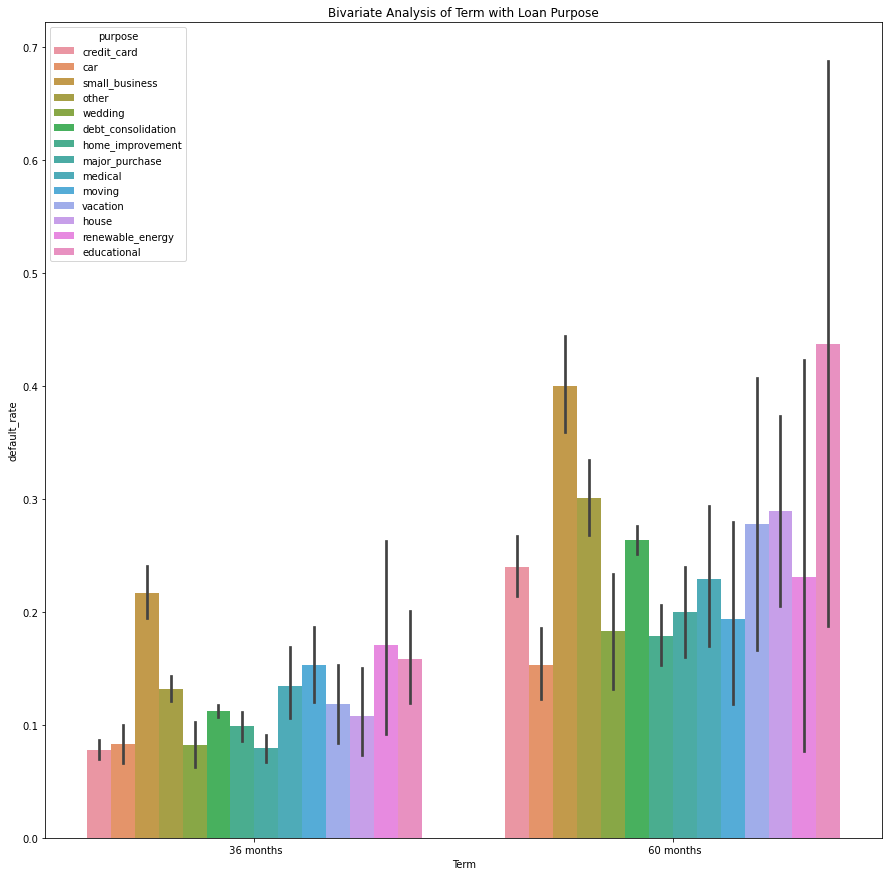

In [146]:
# Bivariate Analysis of Term with Loan Purpose
plt.figure(figsize=[15,15])
sns.barplot(x="term", 
            y="default_rate", 
            hue="purpose", 
            data=loan_cleared)
plt.title('Bivariate Analysis of Term with Loan Purpose')
plt.xlabel('Term')

plt.show()

For 60 months term, "educational" loan purpose has maxiumun chances of getting defaulted followed by "small business"
For 36 months term, "small business" loan purpose has maxiumun chances of getting defaulted followed by "renewable energy"


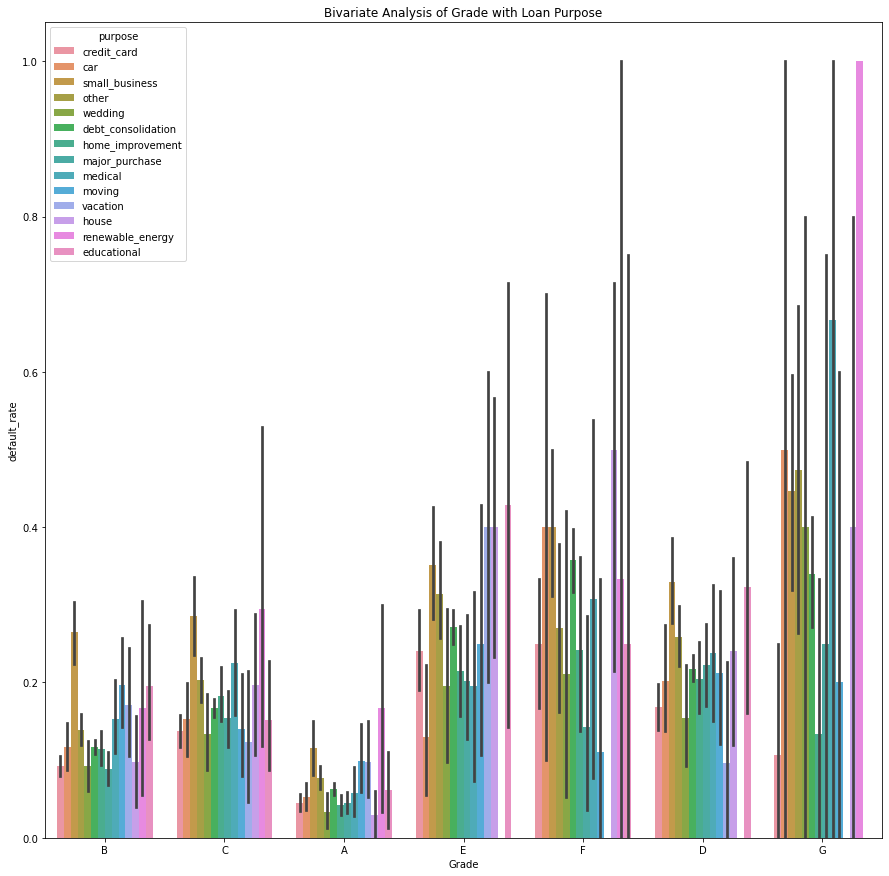

In [147]:
# Bivariate Analysis of grade with Loan Purpose
plt.figure(figsize=[15,15])
sns.barplot(x="grade", 
            y="default_rate", 
            hue="purpose", 
            data=loan_cleared)
plt.title('Bivariate Analysis of Grade with Loan Purpose')
plt.xlabel('Grade')

plt.show()

Grade "G", educational purpose has heighest chances of getting defaulted